<a href="https://colab.research.google.com/github/nicolascavalli/Forma-o-em-Dados/blob/main/Predi%C3%A7%C3%A3o_de_Pre%C3%A7o_de_Seguro_de_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando a base de dados para o colab
from google.colab import files
arquivo = files.upload()

Saving insurance.xlsx to insurance.xlsx


In [ ]:
#Importando as bibliotecas que serão possivelmente utilizadas para o case
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Lendo a base de dados no colab
df = pd.read_excel('insurance.xlsx')
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Verificando os tipos de dados do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [ ]:
#Identificando as linhas com valores nulos
df_null = df[df.isna().any(axis=1)]
df_null

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
1259,30,NaN,40.09,0,no,northeast,0.0
1285,30,NaN,40.09,0,no,northeast,0.0
1331,30,NaN,40.09,0,no,northeast,0.0


In [ ]:
#Eliminando os valores nulos e verificando se foram eliminados
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1338 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1338 non-null   float64
 3   quantidade_filhos  1338 non-null   int64  
 4   fumante            1338 non-null   object 
 5   regiao             1338 non-null   object 
 6   custos_seguro      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
#Verificando se existem duplicatas
df_duplicatas = df.drop_duplicates(ignore_index=True)
df_duplicatas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1337 non-null   int64  
 1   sexo               1337 non-null   object 
 2   imc                1337 non-null   float64
 3   quantidade_filhos  1337 non-null   int64  
 4   fumante            1337 non-null   object 
 5   regiao             1337 non-null   object 
 6   custos_seguro      1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [ ]:
#Copiando o dataset tratado das duplicatas para o dataset original
df = df_duplicatas.copy()

In [ ]:
#Realizando a análise descritiva da base de dados para os valores numéricos
df.describe()

,idade,imc,quantidade_filhos,custos_seguro
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663871,1.095737,13279.121487
std,14.044333,6.100648,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='sexo', ylabel='Count'>

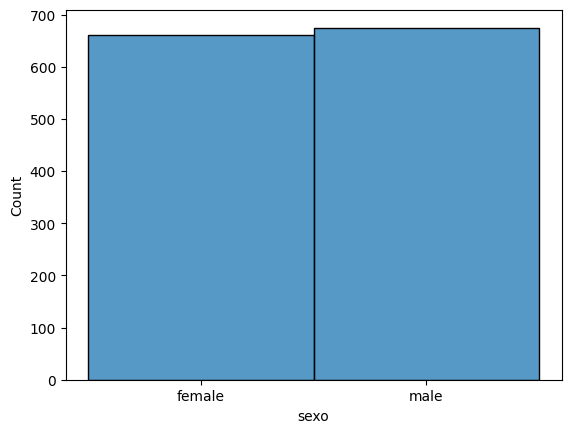

In [ ]:
#Plotando gráficos de distribuição para as variáveis categóricas
sns.histplot(df, x='sexo')

<Axes: xlabel='fumante', ylabel='Count'>

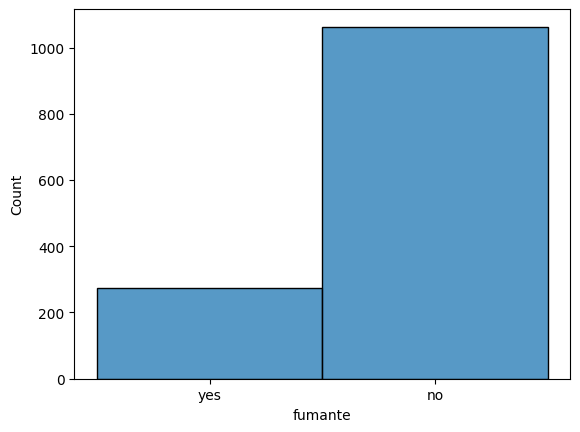

In [ ]:
sns.histplot(df, x='fumante')

<Axes: xlabel='regiao', ylabel='Count'>

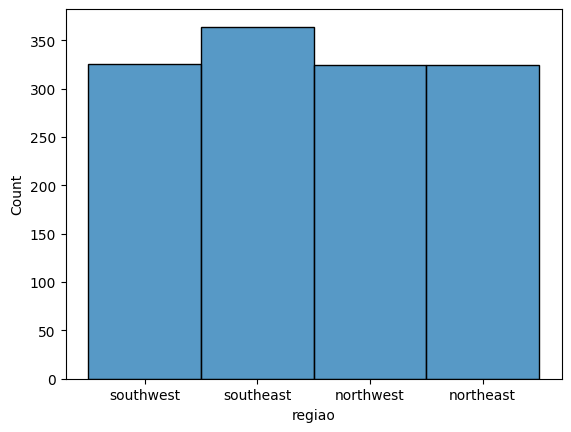

In [ ]:
sns.histplot(df, x='regiao')

<Axes: xlabel='custos_seguro', ylabel='regiao'>

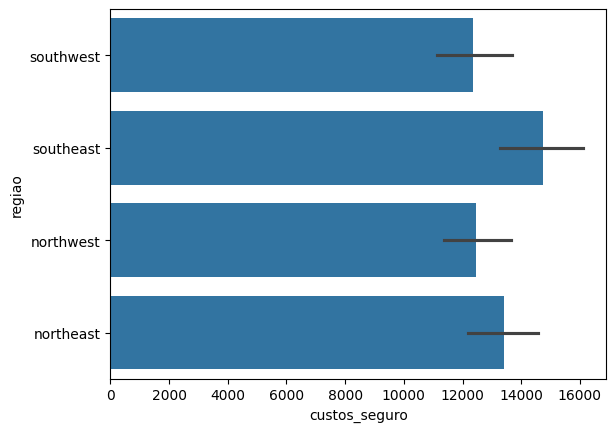

In [ ]:
#Analisando a distrubuição das variáveis categóricas em relação a nossa variável target
sns.barplot(data=df, x='custos_seguro', y='regiao')

<Axes: xlabel='custos_seguro', ylabel='sexo'>

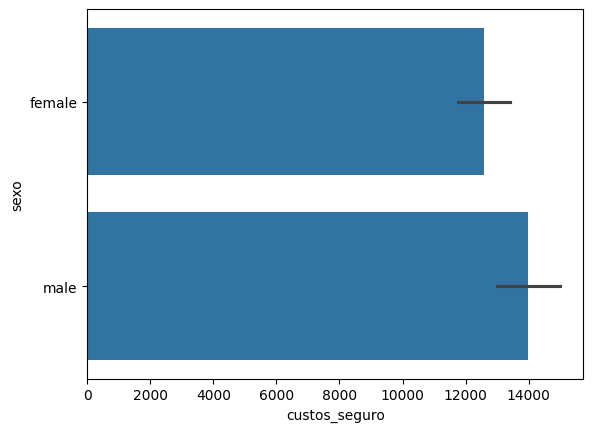

In [ ]:
sns.barplot(data=df, x='custos_seguro', y='sexo')

<Axes: xlabel='custos_seguro', ylabel='fumante'>

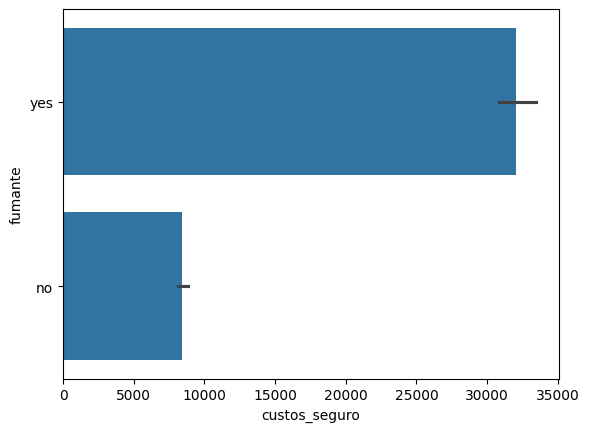

In [ ]:
sns.barplot(data=df, x='custos_seguro', y='fumante')

In [ ]:
#transformando as variáveis categóricas em variáveis numéricas com o LabelEnconder
le = LabelEncoder()
df[['sexo', 'fumante', 'regiao']] = df[['sexo', 'fumante', 'regiao']].apply(le.fit_transform)

In [ ]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.560,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

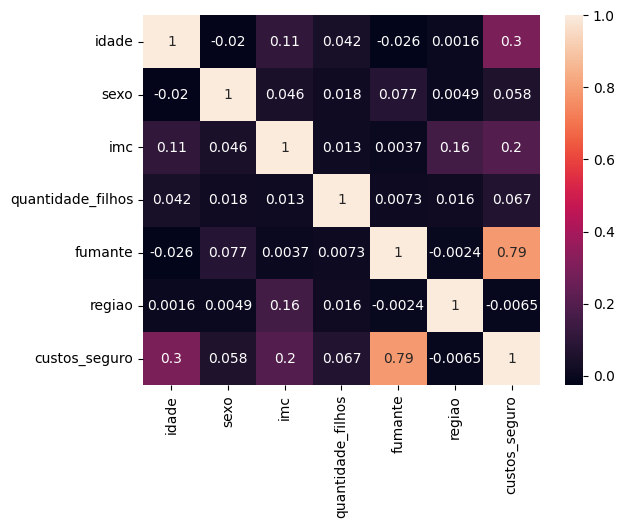

In [ ]:
#Verificando a correlação das variáveis com o HeatMap
sns.heatmap(df.corr(), annot=True)

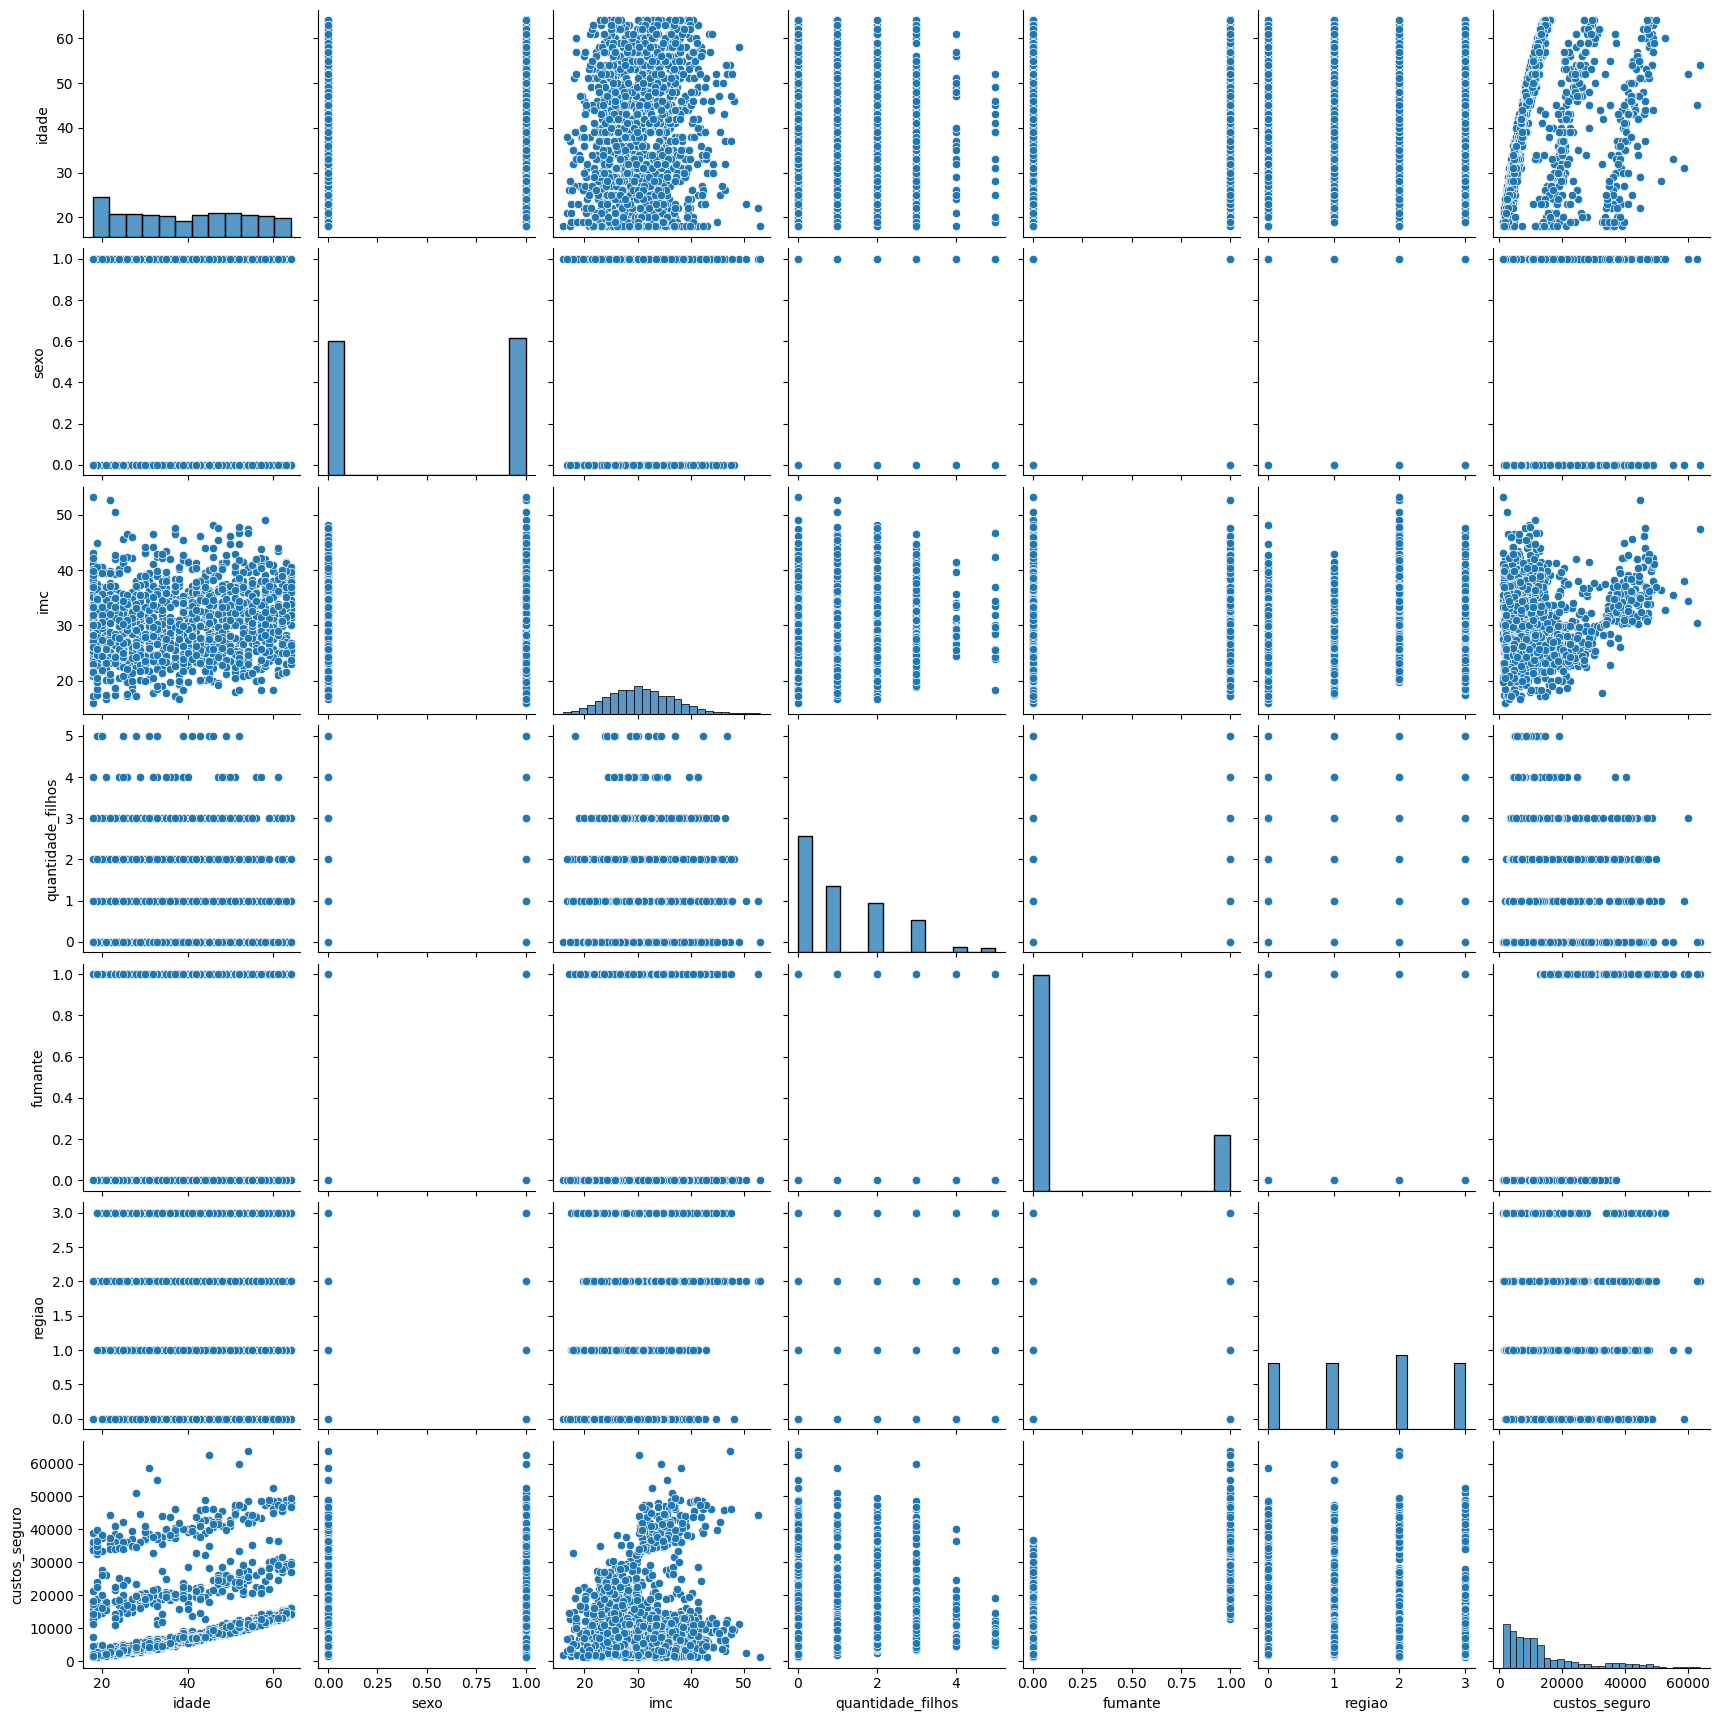

In [ ]:
#Analisando a distribuição das variáveis com o Pairplot
sns.pairplot(df)

In [ ]:
#Normalizando o dataset
mms = MinMaxScaler()
df = pd.DataFrame(mms.fit_transform(df), index = df.index, columns= df.columns)

In [ ]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.473500,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [ ]:
#Separando o dataset em treino e teste
X = df.drop(columns='custos_seguro')
y = df['custos_seguro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(X_test)
print(f'R2 Score: {lr.score(X, y)}')
print(f'MAE: {mean_absolute_error(y_test, lr_pred)}')
print(f'MSE: {mean_squared_error(y_test, lr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred))}')

R2 Score: 0.7497613551732069
MAE: 0.07209466728904726
MSE: 0.011467078785187292
RMSE: 0.10708444698081647


In [ ]:
##Treinando o modelo de Árvore de Decisão de Regressão
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [ ]:
print(f'R2 Score: {dtr.score(X, y)}')
print(f'MAE: {mean_absolute_error(y_test, dtr_pred)}')
print(f'MSE: {mean_squared_error(y_test, dtr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, dtr_pred))}')

R2 Score: 0.9039299338322152
MAE: 0.06051206976316394
MSE: 0.014257229986098087
RMSE: 0.11940364310228598


In [ ]:
#Treinando com RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=5, n_jobs=-1)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [ ]:
print(f'R2 Score: {rfr.score(X, y)}')
print(f'MAE: {mean_absolute_error(y_test, rfr_pred)}')
print(f'MSE: {mean_squared_error(y_test, rfr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rfr_pred))}')

R2 Score: 0.9057348796331285
MAE: 0.05340476667507756
MSE: 0.009298414761592431
RMSE: 0.09642828818138602


In [ ]:
#Treinando com AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

In [ ]:
print(f'R2 Score: {ada.score(X, y)}')
print(f'MAE: {mean_absolute_error(y_test, ada_pred)}')
print(f'MSE: {mean_squared_error(y_test, ada_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, ada_pred))}')

R2 Score: 0.8241164742513747
MAE: 0.06904370257227328
MSE: 0.00787950422933455
RMSE: 0.08876657157587281


In [ ]:
#Treinando com GradientBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [ ]:
print(f'R2 Score: {gbr.score(X, y)}')
print(f'MAE: {mean_absolute_error(y_test, gbr_pred)}')
print(f'MSE: {mean_squared_error(y_test, gbr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, gbr_pred))}')

R2 Score: 0.8924869880111328
MAE: 0.04500272896593486
MSE: 0.006687848009047912
RMSE: 0.08177926393070503


In [ ]:
#Aplicando as técnicas de otimização de hiperparâmetros para o modelo RandomForestRegressor
#Aplicando o GridSearch para o modelo
params = {"bootstrap": [True], "n_estimators": [100], "max_depth": [5], "min_samples_leaf":[4], "min_samples_split":[2]}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(estimator=rfr, param_grid=params, n_jobs=-1, cv=2, scoring='r2')

In [ ]:
#Treinando o modelo de GridSearch
gscv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_estimators=5, n_jobs=-1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='r2')

In [ ]:
#Verificando qual é o melhor modelo
best_model = gscv.best_estimator_
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Aplicando os parâmtros ajustados no modelo GradientBoost
rfr_ajustado = RandomForestRegressor(bootstrap= True,
 ccp_alpha= 0.0,
 criterion= 'squared_error',
 max_depth= 5,
 max_features= 1.0,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 4,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= -1,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [ ]:
rfr_ajustado.fit(X_train, y_train)
rfr_ajust_pred = rfr_ajustado.predict(X_test)

In [ ]:
print(f'R2 Score: {rfr_ajustado.score(X, y)}')
print(f'MAE: {mean_absolute_error(y_test, rfr_ajust_pred)}')
print(f'MSE: {mean_squared_error(y_test, rfr_ajust_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rfr_ajust_pred))}')

R2 Score: 0.8812625156862014
MAE: 0.04404405057179149
MSE: 0.006367018790311229
RMSE: 0.07979360118650636
